# 🏦 Credit Scoring (German Credit UCI) — Runner local (GPU)

Este notebook ejecuta tu proyecto **DNN vs ResNet** llamando a `scripts/credit_main.py` en tu máquina local.
Muestra inline **curvas, ROC, matriz de confusión y SHAP** y permite empaquetar los resultados.

## ✅ Requisitos previos (local)
- Conda env con TensorFlow **GPU** instalado (por ejemplo, `tensorflow==2.15.0` + CUDA 11.8/cuDNN adecuado), o `tensorflow>=2.16` (con soporte cuDNN integrado).
- Paquetes Python: `shap`, `lime`, `imbalanced-learn`.
- Proyecto con estructura:
  ```
  <PROJECT_ROOT>/
    ├── scripts/credit_main.py
    └── src/...
  ```


In [1]:
# 🔧 Parámetros (edita según tu máquina/proyecto)
PROJECT_ROOT = r"/home/malezainia2/mini_projects/machine_learning_projects/Modulo7EvalModularMarcoParra"  # <-- CAMBIA
OUTDIR        = "outputs_credit_local"     # Carpeta de artefactos
EPOCHS        = 20                          # Épocas
BATCH         = 256                         # Batch size
LR            = 1e-3                        # Learning rate
USE_MIXED     = True                        # Precision mixta (fp16) si tu GPU es >= SM 7.0
CUDA_VISIBLE  = "0"                         # Qué GPU usar ("0" o "0,1" etc.)


## 🔧 Comprobación de entorno y GPU
Configura qué GPU usar y activa memory growth para evitar *OOM spikes*.

In [2]:
import os, sys, subprocess, json, glob
os.environ["CUDA_VISIBLE_DEVICES"] = CUDA_VISIBLE

assert os.path.isdir(PROJECT_ROOT), f"No existe PROJECT_ROOT: {PROJECT_ROOT}"
if PROJECT_ROOT not in sys.path:
    sys.path.insert(0, PROJECT_ROOT)
os.chdir(PROJECT_ROOT)
print("Working dir:", os.getcwd())

import tensorflow as tf
print("TensorFlow:", tf.__version__)
gpus = tf.config.list_physical_devices('GPU')
print("GPUs visibles:", gpus)
for g in gpus:
    try:
        tf.config.experimental.set_memory_growth(g, True)
    except Exception as e:
        print("No se pudo activar memory growth en", g, e)

if USE_MIXED:
    try:
        from tensorflow.keras import mixed_precision
        mixed_precision.set_global_policy("mixed_float16")
        print("Mixed precision ON")
    except Exception as e:
        print("No se pudo activar mixed precision:", e)


Working dir: /home/malezainia2/mini_projects/machine_learning_projects/Modulo7EvalModularMarcoParra


2025-08-23 19:36:49.674116: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-23 19:36:49.693543: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-08-23 19:36:49.693561: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-08-23 19:36:49.694285: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-08-23 19:36:49.697772: I tensorflow/core/platform/cpu_feature_guar

TensorFlow: 2.15.1
GPUs visibles: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: NVIDIA GeForce RTX 4090, compute capability 8.9
Mixed precision ON


2025-08-23 19:36:50.379389: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-08-23 19:36:50.399705: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-08-23 19:36:50.400915: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

## ▶️ Ejecutar `scripts/credit_main.py`
Generará artefactos en `OUTDIR` (curves, roc, cm, shap, etc.).

In [3]:
main_path = os.path.join(PROJECT_ROOT, 'scripts', 'credit_main.py')
assert os.path.isfile(main_path), f"No se encontró {main_path}"

cmd = [
    sys.executable, 'scripts/credit_main.py',
    '--data', 'uci',
    '--model', 'both',
    '--out-dir', OUTDIR,
    '--epochs', str(EPOCHS),
    '--batch-size', str(BATCH),
    '--lr', str(LR)
]
if USE_MIXED:
    cmd.append('--mixed')
print('Ejecutando:', ' '.join(cmd))
ret = subprocess.run(cmd)
print("\n✔️ Fin de ejecución. Código de salida:", ret.returncode)

Ejecutando: /home/malezainia2/anaconda3/envs/especialidadmachinelearning/bin/python scripts/credit_main.py --data uci --model both --out-dir outputs_credit_local --epochs 20 --batch-size 256 --lr 0.001 --mixed


2025-08-23 19:36:50.601838: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-23 19:36:50.620563: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-08-23 19:36:50.620581: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-08-23 19:36:50.621192: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-08-23 19:36:50.624266: I tensorflow/core/platform/cpu_feature_guar

GPUs visibles: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Mixed precision ON
EDA: {
  "n_rows": 1000,
  "n_features": 20,
  "num_cols": [
    "duration_months",
    "credit_amount",
    "installment_rate",
    "residence_since",
    "age",
    "existing_credits",
    "people_liable"
  ],
  "cat_cols": [
    "status_checking",
    "credit_history",
    "purpose",
    "savings",
    "employment_since",
    "personal_status_sex",
    "debtors",
    "property",
    "other_installment_plans",
    "housing",
    "job",
    "telephone",
    "foreign_worker"
  ],
  "class_dist": {
    "good": 700,
    "bad": 300
  },
  "target_name": "class"
}

=== Entrenando dnn__lr0.001__bs256__ep20 ===
Epoch 1/20


2025-08-23 19:36:54.759126: I external/local_xla/xla/service/service.cc:168] XLA service 0x7a0f840041d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-08-23 19:36:54.759140: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4090, Compute Capability 8.9
2025-08-23 19:36:54.762468: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-08-23 19:36:54.773433: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
I0000 00:00:1755992214.815647  768736 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.



Epoch 1: val_auc improved from -inf to 0.59208, saving model to outputs_credit_local/dnn__lr0.001__bs256__ep20_best.weights.h5
3/3 - 4s - loss: 0.8026 - accuracy: 0.5183 - auc: 0.5059 - val_loss: 0.7180 - val_accuracy: 0.3000 - val_auc: 0.5921 - lr: 0.0010 - 4s/epoch - 1s/step
Epoch 2/20

Epoch 2: val_auc improved from 0.59208 to 0.63083, saving model to outputs_credit_local/dnn__lr0.001__bs256__ep20_best.weights.h5
3/3 - 0s - loss: 0.7405 - accuracy: 0.5667 - auc: 0.5962 - val_loss: 0.7122 - val_accuracy: 0.4650 - val_auc: 0.6308 - lr: 0.0010 - 86ms/epoch - 29ms/step
Epoch 3/20

Epoch 3: val_auc improved from 0.63083 to 0.63393, saving model to outputs_credit_local/dnn__lr0.001__bs256__ep20_best.weights.h5
3/3 - 0s - loss: 0.7070 - accuracy: 0.6300 - auc: 0.6635 - val_loss: 0.7039 - val_accuracy: 0.6650 - val_auc: 0.6339 - lr: 0.0010 - 81ms/epoch - 27ms/step
Epoch 4/20

Epoch 4: val_auc did not improve from 0.63393
3/3 - 0s - loss: 0.6910 - accuracy: 0.6467 - auc: 0.6792 - val_loss: 

Using 200 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
  0%|          | 0/200 [00:00<?, ?it/s]

13563/13563 [==============================] - 11s 781us/step


  0%|          | 1/200 [00:12<42:39, 12.86s/it]

13563/13563 [==============================] - 11s 831us/step


  1%|          | 2/200 [00:25<41:31, 12.58s/it]

13563/13563 [==============================] - 12s 892us/step


  2%|▏         | 3/200 [00:38<42:16, 12.88s/it]

13563/13563 [==============================] - 12s 920us/step


  2%|▏         | 4/200 [00:52<42:59, 13.16s/it]

13563/13563 [==============================] - 13s 931us/step


  2%|▎         | 5/200 [01:05<43:25, 13.36s/it]

13563/13563 [==============================] - 13s 942us/step


  3%|▎         | 6/200 [01:19<43:49, 13.55s/it]

13563/13563 [==============================] - 11s 794us/step


  4%|▎         | 7/200 [01:31<41:50, 13.01s/it]

13563/13563 [==============================] - 12s 880us/step


  4%|▍         | 8/200 [01:44<41:38, 13.01s/it]

13563/13563 [==============================] - 13s 934us/step


  4%|▍         | 9/200 [01:58<42:09, 13.24s/it]

13563/13563 [==============================] - 11s 818us/step


  5%|▌         | 10/200 [02:10<40:52, 12.91s/it]

13563/13563 [==============================] - 12s 852us/step


  6%|▌         | 11/200 [02:23<40:30, 12.86s/it]

13563/13563 [==============================] - 12s 847us/step


  6%|▌         | 12/200 [02:35<40:01, 12.77s/it]

13563/13563 [==============================] - 10s 738us/step


  6%|▋         | 13/200 [02:46<38:13, 12.26s/it]

13563/13563 [==============================] - 12s 917us/step


  7%|▋         | 14/200 [03:00<39:11, 12.64s/it]

13563/13563 [==============================] - 12s 885us/step


  8%|▊         | 15/200 [03:13<39:22, 12.77s/it]

13563/13563 [==============================] - 13s 946us/step


  8%|▊         | 16/200 [03:27<40:12, 13.11s/it]

13563/13563 [==============================] - 11s 838us/step


  8%|▊         | 17/200 [03:40<39:29, 12.95s/it]

13563/13563 [==============================] - 12s 906us/step


  9%|▉         | 18/200 [03:53<39:41, 13.08s/it]

13563/13563 [==============================] - 11s 782us/step


 10%|▉         | 19/200 [04:05<38:11, 12.66s/it]

13563/13563 [==============================] - 12s 897us/step


 10%|█         | 20/200 [04:18<38:32, 12.84s/it]

13563/13563 [==============================] - 12s 880us/step


 10%|█         | 21/200 [04:31<38:28, 12.89s/it]

13563/13563 [==============================] - 12s 854us/step


 11%|█         | 22/200 [04:44<38:03, 12.83s/it]

13563/13563 [==============================] - 12s 862us/step


 12%|█▏        | 23/200 [04:56<37:48, 12.82s/it]

13563/13563 [==============================] - 13s 925us/step


 12%|█▏        | 24/200 [05:10<38:20, 13.07s/it]

13563/13563 [==============================] - 12s 886us/step


 12%|█▎        | 25/200 [05:23<38:10, 13.09s/it]

13563/13563 [==============================] - 12s 870us/step


 13%|█▎        | 26/200 [05:36<37:47, 13.03s/it]

13563/13563 [==============================] - 13s 926us/step


 14%|█▎        | 27/200 [05:50<38:05, 13.21s/it]

13563/13563 [==============================] - 12s 895us/step


 14%|█▍        | 28/200 [06:03<37:53, 13.22s/it]

13563/13563 [==============================] - 12s 912us/step


 14%|█▍        | 29/200 [06:16<37:53, 13.29s/it]

13563/13563 [==============================] - 13s 968us/step


 15%|█▌        | 30/200 [06:31<38:28, 13.58s/it]

13563/13563 [==============================] - 12s 856us/step


 16%|█▌        | 31/200 [06:43<37:29, 13.31s/it]

13563/13563 [==============================] - 11s 808us/step


 16%|█▌        | 32/200 [06:55<36:13, 12.94s/it]

13563/13563 [==============================] - 13s 942us/step


 16%|█▋        | 33/200 [07:09<36:46, 13.21s/it]

13563/13563 [==============================] - 11s 818us/step


 17%|█▋        | 34/200 [07:21<35:46, 12.93s/it]

13563/13563 [==============================] - 12s 852us/step


 18%|█▊        | 35/200 [07:34<35:19, 12.85s/it]

13563/13563 [==============================] - 12s 875us/step


 18%|█▊        | 36/200 [07:47<35:11, 12.87s/it]

13563/13563 [==============================] - 13s 925us/step


 18%|█▊        | 37/200 [08:01<35:35, 13.10s/it]

13563/13563 [==============================] - 12s 913us/step


 19%|█▉        | 38/200 [08:14<35:41, 13.22s/it]

13563/13563 [==============================] - 12s 874us/step


 20%|█▉        | 39/200 [08:27<35:15, 13.14s/it]

13563/13563 [==============================] - 13s 964us/step


 20%|██        | 40/200 [08:41<35:54, 13.46s/it]

13563/13563 [==============================] - 13s 991us/step


 20%|██        | 41/200 [08:56<36:33, 13.80s/it]

13563/13563 [==============================] - 12s 897us/step


 21%|██        | 42/200 [09:09<35:54, 13.64s/it]

13563/13563 [==============================] - 12s 908us/step


 22%|██▏       | 43/200 [09:23<35:29, 13.56s/it]

13563/13563 [==============================] - 12s 903us/step


 22%|██▏       | 44/200 [09:36<35:04, 13.49s/it]

13563/13563 [==============================] - 13s 951us/step


 22%|██▎       | 45/200 [09:50<35:13, 13.63s/it]

13563/13563 [==============================] - 13s 934us/step


 23%|██▎       | 46/200 [10:04<35:07, 13.68s/it]

13563/13563 [==============================] - 13s 934us/step


 24%|██▎       | 47/200 [10:17<34:58, 13.71s/it]

13563/13563 [==============================] - 13s 942us/step


 24%|██▍       | 48/200 [10:31<34:51, 13.76s/it]

13563/13563 [==============================] - 11s 831us/step


 24%|██▍       | 49/200 [10:44<33:34, 13.34s/it]

13563/13563 [==============================] - 11s 813us/step


 25%|██▌       | 50/200 [10:56<32:26, 12.97s/it]

13563/13563 [==============================] - 11s 799us/step


 26%|██▌       | 51/200 [11:08<31:26, 12.66s/it]

13563/13563 [==============================] - 12s 913us/step


 26%|██▌       | 52/200 [11:21<31:50, 12.91s/it]

13563/13563 [==============================] - 13s 947us/step


 26%|██▋       | 53/200 [11:35<32:24, 13.23s/it]

13563/13563 [==============================] - 12s 889us/step


 27%|██▋       | 54/200 [11:48<32:07, 13.20s/it]

13563/13563 [==============================] - 13s 981us/step


 28%|██▊       | 55/200 [12:03<32:45, 13.56s/it]

13563/13563 [==============================] - 12s 904us/step


 28%|██▊       | 56/200 [12:16<32:22, 13.49s/it]

13563/13563 [==============================] - 13s 980us/step


 28%|██▊       | 57/200 [12:31<32:50, 13.78s/it]

13563/13563 [==============================] - 13s 989us/step


 29%|██▉       | 58/200 [12:45<33:08, 14.00s/it]

13563/13563 [==============================] - 13s 924us/step


 30%|██▉       | 59/200 [12:59<32:38, 13.89s/it]

13563/13563 [==============================] - 12s 891us/step


 30%|███       | 60/200 [13:12<31:54, 13.67s/it]

13563/13563 [==============================] - 11s 830us/step


 30%|███       | 61/200 [13:24<30:44, 13.27s/it]

13563/13563 [==============================] - 12s 875us/step


 31%|███       | 62/200 [13:37<30:19, 13.18s/it]

13563/13563 [==============================] - 13s 923us/step


 32%|███▏      | 63/200 [13:51<30:27, 13.34s/it]

13563/13563 [==============================] - 13s 932us/step


 32%|███▏      | 64/200 [14:05<30:32, 13.47s/it]

13563/13563 [==============================] - 11s 806us/step


 32%|███▎      | 65/200 [14:17<29:20, 13.04s/it]

13563/13563 [==============================] - 12s 860us/step


 33%|███▎      | 66/200 [14:29<28:56, 12.96s/it]

13563/13563 [==============================] - 12s 910us/step


 34%|███▎      | 67/200 [14:43<29:01, 13.10s/it]

13563/13563 [==============================] - 13s 924us/step


 34%|███▍      | 68/200 [14:56<29:09, 13.25s/it]

13563/13563 [==============================] - 12s 885us/step


 34%|███▍      | 69/200 [15:10<28:50, 13.21s/it]

13563/13563 [==============================] - 13s 994us/step


 35%|███▌      | 70/200 [15:24<29:30, 13.62s/it]

13563/13563 [==============================] - 13s 922us/step


 36%|███▌      | 71/200 [15:38<29:16, 13.62s/it]

13563/13563 [==============================] - 12s 859us/step


 36%|███▌      | 72/200 [15:51<28:30, 13.37s/it]

13563/13563 [==============================] - 12s 883us/step


 36%|███▋      | 73/200 [16:04<28:06, 13.28s/it]

13563/13563 [==============================] - 13s 941us/step


 37%|███▋      | 74/200 [16:17<28:14, 13.45s/it]

13563/13563 [==============================] - 12s 890us/step


 38%|███▊      | 75/200 [16:31<27:50, 13.36s/it]

13563/13563 [==============================] - 11s 844us/step


 38%|███▊      | 76/200 [16:43<27:06, 13.12s/it]

13563/13563 [==============================] - 13s 924us/step


 38%|███▊      | 77/200 [16:57<27:14, 13.29s/it]

13563/13563 [==============================] - 13s 959us/step


 39%|███▉      | 78/200 [17:11<27:31, 13.54s/it]

13563/13563 [==============================] - 12s 880us/step


 40%|███▉      | 79/200 [17:24<26:59, 13.38s/it]

13563/13563 [==============================] - 11s 786us/step


 40%|████      | 80/200 [17:36<25:49, 12.92s/it]

13563/13563 [==============================] - 12s 857us/step


 40%|████      | 81/200 [17:49<25:29, 12.85s/it]

13563/13563 [==============================] - 13s 987us/step


 41%|████      | 82/200 [18:03<26:14, 13.34s/it]

13563/13563 [==============================] - 13s 952us/step


 42%|████▏     | 83/200 [18:17<26:24, 13.54s/it]

13563/13563 [==============================] - 12s 918us/step


 42%|████▏     | 84/200 [18:31<26:10, 13.54s/it]

13563/13563 [==============================] - 13s 980us/step


 42%|████▎     | 85/200 [18:45<26:25, 13.78s/it]

13563/13563 [==============================] - 12s 848us/step


 43%|████▎     | 86/200 [18:58<25:34, 13.46s/it]

13563/13563 [==============================] - 12s 903us/step


 44%|████▎     | 87/200 [19:11<25:17, 13.43s/it]

13563/13563 [==============================] - 12s 890us/step


 44%|████▍     | 88/200 [19:24<24:55, 13.35s/it]

13563/13563 [==============================] - 13s 944us/step


 44%|████▍     | 89/200 [19:38<25:02, 13.53s/it]

13563/13563 [==============================] - 11s 840us/step


 45%|████▌     | 90/200 [19:51<24:13, 13.21s/it]

13563/13563 [==============================] - 11s 846us/step


 46%|████▌     | 91/200 [20:03<23:38, 13.01s/it]

13563/13563 [==============================] - 11s 782us/step


 46%|████▌     | 92/200 [20:15<22:44, 12.63s/it]

13563/13563 [==============================] - 12s 850us/step


 46%|████▋     | 93/200 [20:28<22:32, 12.64s/it]

13563/13563 [==============================] - 13s 924us/step


 47%|████▋     | 94/200 [20:41<22:51, 12.94s/it]

13563/13563 [==============================] - 12s 874us/step


 48%|████▊     | 95/200 [20:54<22:37, 12.93s/it]

13563/13563 [==============================] - 12s 860us/step


 48%|████▊     | 96/200 [21:07<22:18, 12.87s/it]

13563/13563 [==============================] - 12s 893us/step


 48%|████▊     | 97/200 [21:20<22:15, 12.97s/it]

13563/13563 [==============================] - 13s 945us/step


 49%|████▉     | 98/200 [21:34<22:31, 13.25s/it]

13563/13563 [==============================] - 13s 930us/step


 50%|████▉     | 99/200 [21:48<22:31, 13.38s/it]

13563/13563 [==============================] - 12s 889us/step


 50%|█████     | 100/200 [22:01<22:10, 13.31s/it]

13563/13563 [==============================] - 11s 824us/step


 50%|█████     | 101/200 [22:13<21:26, 12.99s/it]

13563/13563 [==============================] - 12s 914us/step


 51%|█████     | 102/200 [22:26<21:27, 13.14s/it]

13563/13563 [==============================] - 13s 928us/step


 52%|█████▏    | 103/200 [22:40<21:32, 13.32s/it]

13563/13563 [==============================] - 12s 909us/step


 52%|█████▏    | 104/200 [22:54<21:21, 13.35s/it]

13563/13563 [==============================] - 12s 869us/step


 52%|█████▎    | 105/200 [23:07<20:55, 13.21s/it]

13563/13563 [==============================] - 13s 957us/step


 53%|█████▎    | 106/200 [23:21<21:07, 13.48s/it]

13563/13563 [==============================] - 12s 859us/step


 54%|█████▎    | 107/200 [23:33<20:33, 13.27s/it]

13563/13563 [==============================] - 11s 813us/step


 54%|█████▍    | 108/200 [23:46<19:50, 12.94s/it]

13563/13563 [==============================] - 11s 838us/step


 55%|█████▍    | 109/200 [23:58<19:26, 12.82s/it]

13563/13563 [==============================] - 11s 818us/step


 55%|█████▌    | 110/200 [24:10<18:56, 12.63s/it]

13563/13563 [==============================] - 12s 881us/step


 56%|█████▌    | 111/200 [24:23<18:55, 12.76s/it]

13563/13563 [==============================] - 13s 967us/step


 56%|█████▌    | 112/200 [24:38<19:20, 13.19s/it]

13563/13563 [==============================] - 11s 809us/step


 56%|█████▋    | 113/200 [24:50<18:37, 12.85s/it]

13563/13563 [==============================] - 13s 928us/step


 57%|█████▋    | 114/200 [25:03<18:46, 13.10s/it]

13563/13563 [==============================] - 12s 883us/step


 57%|█████▊    | 115/200 [25:16<18:33, 13.10s/it]

13563/13563 [==============================] - 13s 962us/step


 58%|█████▊    | 116/200 [25:31<18:46, 13.41s/it]

13563/13563 [==============================] - 12s 859us/step


 58%|█████▊    | 117/200 [25:43<18:16, 13.21s/it]

13563/13563 [==============================] - 11s 798us/step


 59%|█████▉    | 118/200 [25:55<17:31, 12.82s/it]

13563/13563 [==============================] - 11s 812us/step


 60%|█████▉    | 119/200 [26:07<17:00, 12.60s/it]

13563/13563 [==============================] - 12s 902us/step


 60%|██████    | 120/200 [26:21<17:05, 12.82s/it]

13563/13563 [==============================] - 14s 1ms/step


 60%|██████    | 121/200 [26:35<17:40, 13.42s/it]

13563/13563 [==============================] - 10s 746us/step


 61%|██████    | 122/200 [26:47<16:35, 12.76s/it]

13563/13563 [==============================] - 12s 882us/step


 62%|██████▏   | 123/200 [27:00<16:30, 12.86s/it]

13563/13563 [==============================] - 12s 878us/step


 62%|██████▏   | 124/200 [27:13<16:20, 12.90s/it]

13563/13563 [==============================] - 13s 932us/step


 62%|██████▎   | 125/200 [27:26<16:25, 13.14s/it]

13563/13563 [==============================] - 12s 863us/step


 63%|██████▎   | 126/200 [27:39<16:06, 13.07s/it]

13563/13563 [==============================] - 13s 923us/step


 64%|██████▎   | 127/200 [27:53<16:06, 13.24s/it]

13563/13563 [==============================] - 12s 900us/step


 64%|██████▍   | 128/200 [28:06<15:54, 13.25s/it]

13563/13563 [==============================] - 13s 922us/step


 64%|██████▍   | 129/200 [28:20<15:48, 13.36s/it]

13563/13563 [==============================] - 12s 892us/step


 65%|██████▌   | 130/200 [28:33<15:31, 13.31s/it]

13563/13563 [==============================] - 12s 853us/step


 66%|██████▌   | 131/200 [28:46<15:04, 13.12s/it]

13563/13563 [==============================] - 12s 868us/step


 66%|██████▌   | 132/200 [28:59<14:48, 13.06s/it]

13563/13563 [==============================] - 13s 922us/step


 66%|██████▋   | 133/200 [29:12<14:45, 13.22s/it]

13563/13563 [==============================] - 12s 875us/step


 67%|██████▋   | 134/200 [29:25<14:27, 13.15s/it]

13563/13563 [==============================] - 11s 830us/step


 68%|██████▊   | 135/200 [29:38<13:59, 12.91s/it]

13563/13563 [==============================] - 12s 899us/step


 68%|██████▊   | 136/200 [29:51<13:53, 13.02s/it]

13563/13563 [==============================] - 12s 884us/step


 68%|██████▊   | 137/200 [30:04<13:40, 13.03s/it]

13563/13563 [==============================] - 11s 818us/step


 69%|██████▉   | 138/200 [30:16<13:12, 12.78s/it]

13563/13563 [==============================] - 11s 842us/step


 70%|██████▉   | 139/200 [30:29<12:54, 12.70s/it]

13563/13563 [==============================] - 12s 911us/step


 70%|███████   | 140/200 [30:42<12:55, 12.93s/it]

13563/13563 [==============================] - 11s 842us/step


 70%|███████   | 141/200 [30:55<12:35, 12.80s/it]

13563/13563 [==============================] - 11s 814us/step


 71%|███████   | 142/200 [31:07<12:11, 12.61s/it]

13563/13563 [==============================] - 12s 866us/step


 72%|███████▏  | 143/200 [31:20<12:02, 12.67s/it]

13563/13563 [==============================] - 12s 878us/step


 72%|███████▏  | 144/200 [31:33<11:55, 12.77s/it]

13563/13563 [==============================] - 10s 742us/step


 72%|███████▎  | 145/200 [31:44<11:15, 12.29s/it]

13563/13563 [==============================] - 13s 962us/step


 73%|███████▎  | 146/200 [31:58<11:33, 12.84s/it]

13563/13563 [==============================] - 11s 813us/step


 74%|███████▎  | 147/200 [32:10<11:08, 12.62s/it]

13563/13563 [==============================] - 12s 868us/step


 74%|███████▍  | 148/200 [32:23<11:00, 12.71s/it]

13563/13563 [==============================] - 12s 885us/step


 74%|███████▍  | 149/200 [32:36<10:55, 12.86s/it]

13563/13563 [==============================] - 12s 889us/step


 75%|███████▌  | 150/200 [32:49<10:47, 12.95s/it]

13563/13563 [==============================] - 10s 765us/step


 76%|███████▌  | 151/200 [33:01<10:12, 12.51s/it]

13563/13563 [==============================] - 12s 863us/step


 76%|███████▌  | 152/200 [33:14<10:04, 12.60s/it]

13563/13563 [==============================] - 11s 816us/step


 76%|███████▋  | 153/200 [33:26<09:45, 12.46s/it]

13563/13563 [==============================] - 12s 896us/step


 77%|███████▋  | 154/200 [33:39<09:44, 12.70s/it]

13563/13563 [==============================] - 12s 908us/step


 78%|███████▊  | 155/200 [33:52<09:42, 12.93s/it]

13563/13563 [==============================] - 11s 825us/step


 78%|███████▊  | 156/200 [34:05<09:20, 12.73s/it]

13563/13563 [==============================] - 10s 727us/step


 78%|███████▊  | 157/200 [34:16<08:44, 12.19s/it]

13563/13563 [==============================] - 11s 797us/step


 79%|███████▉  | 158/200 [34:27<08:28, 12.10s/it]

13563/13563 [==============================] - 12s 891us/step


 80%|███████▉  | 159/200 [34:41<08:29, 12.42s/it]

13563/13563 [==============================] - 13s 922us/step


 80%|████████  | 160/200 [34:54<08:30, 12.77s/it]

13563/13563 [==============================] - 12s 882us/step


 80%|████████  | 161/200 [35:07<08:21, 12.86s/it]

13563/13563 [==============================] - 14s 995us/step


 81%|████████  | 162/200 [35:22<08:28, 13.37s/it]

13563/13563 [==============================] - 11s 816us/step


 82%|████████▏ | 163/200 [35:34<08:01, 13.01s/it]

13563/13563 [==============================] - 13s 922us/step


 82%|████████▏ | 164/200 [35:48<07:54, 13.18s/it]

13563/13563 [==============================] - 12s 887us/step


 82%|████████▎ | 165/200 [36:01<07:40, 13.16s/it]

13563/13563 [==============================] - 12s 898us/step


 83%|████████▎ | 166/200 [36:14<07:28, 13.19s/it]

13563/13563 [==============================] - 12s 895us/step


 84%|████████▎ | 167/200 [36:27<07:15, 13.20s/it]

13563/13563 [==============================] - 12s 896us/step


 84%|████████▍ | 168/200 [36:40<07:02, 13.22s/it]

13563/13563 [==============================] - 12s 858us/step


 84%|████████▍ | 169/200 [36:53<06:45, 13.07s/it]

13563/13563 [==============================] - 11s 802us/step


 85%|████████▌ | 170/200 [37:05<06:21, 12.73s/it]

13563/13563 [==============================] - 11s 779us/step


 86%|████████▌ | 171/200 [37:17<05:59, 12.41s/it]

13563/13563 [==============================] - 11s 833us/step


 86%|████████▌ | 172/200 [37:29<05:47, 12.42s/it]

13563/13563 [==============================] - 12s 902us/step


 86%|████████▋ | 173/200 [37:43<05:42, 12.69s/it]

13563/13563 [==============================] - 12s 915us/step


 87%|████████▋ | 174/200 [37:56<05:36, 12.93s/it]

13563/13563 [==============================] - 12s 872us/step


 88%|████████▊ | 175/200 [38:09<05:23, 12.93s/it]

13563/13563 [==============================] - 12s 872us/step


 88%|████████▊ | 176/200 [38:22<05:10, 12.92s/it]

13563/13563 [==============================] - 12s 849us/step


 88%|████████▊ | 177/200 [38:35<04:55, 12.83s/it]

13563/13563 [==============================] - 11s 827us/step


 89%|████████▉ | 178/200 [38:47<04:39, 12.70s/it]

13563/13563 [==============================] - 11s 835us/step


 90%|████████▉ | 179/200 [38:59<04:24, 12.62s/it]

13563/13563 [==============================] - 12s 861us/step


 90%|█████████ | 180/200 [39:12<04:13, 12.65s/it]

13563/13563 [==============================] - 12s 910us/step


 90%|█████████ | 181/200 [39:26<04:04, 12.89s/it]

13563/13563 [==============================] - 12s 871us/step


 91%|█████████ | 182/200 [39:38<03:52, 12.90s/it]

13563/13563 [==============================] - 13s 950us/step


 92%|█████████▏| 183/200 [39:52<03:44, 13.23s/it]

13563/13563 [==============================] - 10s 756us/step


 92%|█████████▏| 184/200 [40:04<03:22, 12.66s/it]

13563/13563 [==============================] - 11s 838us/step


 92%|█████████▎| 185/200 [40:16<03:08, 12.60s/it]

13563/13563 [==============================] - 11s 845us/step


 93%|█████████▎| 186/200 [40:29<02:56, 12.58s/it]

13563/13563 [==============================] - 12s 856us/step


 94%|█████████▎| 187/200 [40:41<02:43, 12.62s/it]

13563/13563 [==============================] - 11s 842us/step


 94%|█████████▍| 188/200 [40:54<02:31, 12.59s/it]

13563/13563 [==============================] - 12s 882us/step


 94%|█████████▍| 189/200 [41:07<02:19, 12.72s/it]

13563/13563 [==============================] - 13s 958us/step


 95%|█████████▌| 190/200 [41:21<02:11, 13.14s/it]

13563/13563 [==============================] - 12s 898us/step


 96%|█████████▌| 191/200 [41:34<01:58, 13.18s/it]

13563/13563 [==============================] - 12s 895us/step


 96%|█████████▌| 192/200 [41:48<01:45, 13.20s/it]

13563/13563 [==============================] - 13s 949us/step


 96%|█████████▋| 193/200 [42:02<01:34, 13.44s/it]

13563/13563 [==============================] - 13s 955us/step


 97%|█████████▋| 194/200 [42:16<01:21, 13.63s/it]

13563/13563 [==============================] - 11s 829us/step


 98%|█████████▊| 195/200 [42:28<01:06, 13.26s/it]

13563/13563 [==============================] - 13s 945us/step


 98%|█████████▊| 196/200 [42:42<00:53, 13.46s/it]

13563/13563 [==============================] - 12s 865us/step


 98%|█████████▊| 197/200 [42:55<00:39, 13.27s/it]

13563/13563 [==============================] - 13s 937us/step


 99%|█████████▉| 198/200 [43:09<00:26, 13.43s/it]

13563/13563 [==============================] - 13s 933us/step


100%|█████████▉| 199/200 [43:22<00:13, 13.53s/it]

13563/13563 [==============================] - 12s 897us/step


100%|██████████| 200/200 [43:36<00:00, 13.08s/it]
/home/malezainia2/mini_projects/machine_learning_projects/Modulo7EvalModularMarcoParra/src/explain/shap_lime.py:19: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(vals, X_sample, feature_names=feature_names, show=False)
/home/malezainia2/anaconda3/envs/especialidadmachinelearning/lib/python3.10/site-packages/shap/plots/_beeswarm.py:723: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(



=== Entrenando resnet__lr0.001__bs256__ep20 ===
Epoch 1/20

Epoch 1: val_auc improved from -inf to 0.66107, saving model to outputs_credit_local/resnet__lr0.001__bs256__ep20_best.weights.h5
3/3 - 2s - loss: 1.2369 - accuracy: 0.4517 - auc: 0.4965 - val_loss: 0.7420 - val_accuracy: 0.4450 - val_auc: 0.6611 - lr: 0.0010 - 2s/epoch - 767ms/step
Epoch 2/20

Epoch 2: val_auc improved from 0.66107 to 0.70560, saving model to outputs_credit_local/resnet__lr0.001__bs256__ep20_best.weights.h5
3/3 - 0s - loss: 0.9875 - accuracy: 0.5717 - auc: 0.6220 - val_loss: 0.6565 - val_accuracy: 0.6750 - val_auc: 0.7056 - lr: 0.0010 - 89ms/epoch - 30ms/step
Epoch 3/20

Epoch 3: val_auc improved from 0.70560 to 0.72363, saving model to outputs_credit_local/resnet__lr0.001__bs256__ep20_best.weights.h5
3/3 - 0s - loss: 0.7995 - accuracy: 0.6750 - auc: 0.7082 - val_loss: 0.6116 - val_accuracy: 0.7100 - val_auc: 0.7236 - lr: 0.0010 - 89ms/epoch - 30ms/step
Epoch 4/20

Epoch 4: val_auc improved from 0.72363 to 0

Using 200 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
  0%|          | 0/200 [00:00<?, ?it/s]

13563/13563 [==============================] - 12s 884us/step


  0%|          | 1/200 [00:13<43:13, 13.03s/it]

13563/13563 [==============================] - 10s 769us/step


  1%|          | 2/200 [00:24<39:58, 12.11s/it]

13563/13563 [==============================] - 14s 994us/step


  2%|▏         | 3/200 [00:39<43:23, 13.21s/it]

13563/13563 [==============================] - 12s 916us/step


  2%|▏         | 4/200 [00:52<43:31, 13.32s/it]

13563/13563 [==============================] - 10s 723us/step


  2%|▎         | 5/200 [01:03<40:26, 12.45s/it]

13563/13563 [==============================] - 12s 906us/step


  3%|▎         | 6/200 [01:16<41:14, 12.75s/it]

13563/13563 [==============================] - 11s 844us/step


  4%|▎         | 7/200 [01:29<40:47, 12.68s/it]

13563/13563 [==============================] - 13s 950us/step


  4%|▍         | 8/200 [01:43<41:50, 13.08s/it]

13563/13563 [==============================] - 12s 889us/step


  4%|▍         | 9/200 [01:56<41:39, 13.09s/it]

13563/13563 [==============================] - 13s 943us/step


  5%|▌         | 10/200 [02:10<42:19, 13.37s/it]

13563/13563 [==============================] - 13s 966us/step


  6%|▌         | 11/200 [02:24<42:55, 13.63s/it]

13563/13563 [==============================] - 13s 923us/step


  6%|▌         | 12/200 [02:38<42:40, 13.62s/it]

13563/13563 [==============================] - 12s 857us/step


  6%|▋         | 13/200 [02:50<41:33, 13.33s/it]

13563/13563 [==============================] - 12s 884us/step


  7%|▋         | 14/200 [03:03<41:03, 13.25s/it]

13563/13563 [==============================] - 12s 881us/step


  8%|▊         | 15/200 [03:16<40:39, 13.18s/it]

13563/13563 [==============================] - 12s 860us/step


  8%|▊         | 16/200 [03:29<39:59, 13.04s/it]

13563/13563 [==============================] - 11s 841us/step


  8%|▊         | 17/200 [03:42<39:14, 12.87s/it]

13563/13563 [==============================] - 12s 865us/step


  9%|▉         | 18/200 [03:54<38:57, 12.85s/it]

13563/13563 [==============================] - 13s 939us/step


 10%|▉         | 19/200 [04:08<39:37, 13.14s/it]

13563/13563 [==============================] - 12s 870us/step


 10%|█         | 20/200 [04:21<39:09, 13.05s/it]

13563/13563 [==============================] - 12s 917us/step


 10%|█         | 21/200 [04:35<39:19, 13.18s/it]

13563/13563 [==============================] - 11s 793us/step


 11%|█         | 22/200 [04:46<37:52, 12.77s/it]

13563/13563 [==============================] - 12s 919us/step


 12%|█▏        | 23/200 [05:00<38:29, 13.05s/it]

13563/13563 [==============================] - 11s 809us/step


 12%|█▏        | 24/200 [05:12<37:24, 12.75s/it]

13563/13563 [==============================] - 10s 773us/step


 12%|█▎        | 25/200 [05:24<36:08, 12.39s/it]

13563/13563 [==============================] - 13s 963us/step


 13%|█▎        | 26/200 [05:38<37:25, 12.91s/it]

13563/13563 [==============================] - 11s 815us/step


 14%|█▎        | 27/200 [05:50<36:32, 12.67s/it]

13563/13563 [==============================] - 11s 780us/step


 14%|█▍        | 28/200 [06:02<35:27, 12.37s/it]

13563/13563 [==============================] - 13s 952us/step


 14%|█▍        | 29/200 [06:16<36:38, 12.86s/it]

13563/13563 [==============================] - 11s 806us/step


 15%|█▌        | 30/200 [06:28<35:42, 12.61s/it]

13563/13563 [==============================] - 12s 876us/step


 16%|█▌        | 31/200 [06:41<35:48, 12.71s/it]

13563/13563 [==============================] - 12s 920us/step


 16%|█▌        | 32/200 [06:54<36:17, 12.96s/it]

13563/13563 [==============================] - 12s 906us/step


 16%|█▋        | 33/200 [07:07<36:24, 13.08s/it]

13563/13563 [==============================] - 13s 927us/step


 17%|█▋        | 34/200 [07:21<36:39, 13.25s/it]

13563/13563 [==============================] - 12s 872us/step


 18%|█▊        | 35/200 [07:34<36:11, 13.16s/it]

13563/13563 [==============================] - 11s 811us/step


 18%|█▊        | 36/200 [07:46<35:08, 12.86s/it]

13563/13563 [==============================] - 12s 901us/step


 18%|█▊        | 37/200 [07:59<35:18, 12.99s/it]

13563/13563 [==============================] - 13s 972us/step


 19%|█▉        | 38/200 [08:14<36:06, 13.37s/it]

13563/13563 [==============================] - 11s 814us/step


 20%|█▉        | 39/200 [08:26<34:52, 13.00s/it]

13563/13563 [==============================] - 13s 924us/step


 20%|██        | 40/200 [08:39<35:10, 13.19s/it]

13563/13563 [==============================] - 13s 946us/step


 20%|██        | 41/200 [08:53<35:31, 13.41s/it]

13563/13563 [==============================] - 12s 866us/step


 21%|██        | 42/200 [09:06<34:49, 13.22s/it]

13563/13563 [==============================] - 12s 905us/step


 22%|██▏       | 43/200 [09:20<34:41, 13.26s/it]

13563/13563 [==============================] - 12s 858us/step


 22%|██▏       | 44/200 [09:32<34:02, 13.09s/it]

13563/13563 [==============================] - 12s 850us/step


 22%|██▎       | 45/200 [09:45<33:28, 12.96s/it]

13563/13563 [==============================] - 12s 862us/step


 23%|██▎       | 46/200 [09:58<33:05, 12.89s/it]

13563/13563 [==============================] - 12s 860us/step


 24%|██▎       | 47/200 [10:10<32:44, 12.84s/it]

13563/13563 [==============================] - 12s 874us/step


 24%|██▍       | 48/200 [10:23<32:35, 12.86s/it]

13563/13563 [==============================] - 12s 864us/step


 24%|██▍       | 49/200 [10:36<32:24, 12.88s/it]

13563/13563 [==============================] - 12s 877us/step


 25%|██▌       | 50/200 [10:49<32:16, 12.91s/it]

13563/13563 [==============================] - 12s 895us/step


 26%|██▌       | 51/200 [11:02<32:16, 13.00s/it]

13563/13563 [==============================] - 12s 854us/step


 26%|██▌       | 52/200 [11:15<31:48, 12.90s/it]

13563/13563 [==============================] - 11s 782us/step


 26%|██▋       | 53/200 [11:27<30:42, 12.53s/it]

13563/13563 [==============================] - 12s 855us/step


 27%|██▋       | 54/200 [11:39<30:35, 12.57s/it]

13563/13563 [==============================] - 11s 843us/step


 28%|██▊       | 55/200 [11:52<30:19, 12.55s/it]

13563/13563 [==============================] - 11s 834us/step


 28%|██▊       | 56/200 [12:04<30:00, 12.50s/it]

13563/13563 [==============================] - 12s 884us/step


 28%|██▊       | 57/200 [12:17<30:11, 12.67s/it]

13563/13563 [==============================] - 12s 905us/step


 29%|██▉       | 58/200 [12:31<30:28, 12.88s/it]

13563/13563 [==============================] - 13s 934us/step


 30%|██▉       | 59/200 [12:44<30:52, 13.14s/it]

13563/13563 [==============================] - 12s 858us/step


 30%|███       | 60/200 [12:57<30:21, 13.01s/it]

13563/13563 [==============================] - 13s 945us/step


 30%|███       | 61/200 [13:11<30:46, 13.28s/it]

13563/13563 [==============================] - 12s 899us/step


 31%|███       | 62/200 [13:24<30:36, 13.31s/it]

13563/13563 [==============================] - 12s 887us/step


 32%|███▏      | 63/200 [13:38<30:14, 13.24s/it]

13563/13563 [==============================] - 13s 931us/step


 32%|███▏      | 64/200 [13:51<30:19, 13.38s/it]

13563/13563 [==============================] - 12s 902us/step


 32%|███▎      | 65/200 [14:05<30:03, 13.36s/it]

13563/13563 [==============================] - 12s 858us/step


 33%|███▎      | 66/200 [14:17<29:22, 13.15s/it]

13563/13563 [==============================] - 13s 948us/step


 34%|███▎      | 67/200 [14:31<29:40, 13.39s/it]

13563/13563 [==============================] - 12s 909us/step


 34%|███▍      | 68/200 [14:45<29:29, 13.41s/it]

13563/13563 [==============================] - 11s 835us/step


 34%|███▍      | 69/200 [14:57<28:36, 13.10s/it]

13563/13563 [==============================] - 13s 929us/step


 35%|███▌      | 70/200 [15:11<28:45, 13.27s/it]

13563/13563 [==============================] - 12s 907us/step


 36%|███▌      | 71/200 [15:24<28:35, 13.30s/it]

13563/13563 [==============================] - 12s 861us/step


 36%|███▌      | 72/200 [15:37<28:00, 13.13s/it]

13563/13563 [==============================] - 13s 933us/step


 36%|███▋      | 73/200 [15:50<28:10, 13.31s/it]

13563/13563 [==============================] - 11s 835us/step


 37%|███▋      | 74/200 [16:03<27:21, 13.03s/it]

13563/13563 [==============================] - 13s 925us/step


 38%|███▊      | 75/200 [16:17<27:33, 13.23s/it]

13563/13563 [==============================] - 12s 862us/step


 38%|███▊      | 76/200 [16:29<27:01, 13.08s/it]

13563/13563 [==============================] - 13s 945us/step


 38%|███▊      | 77/200 [16:43<27:18, 13.32s/it]

13563/13563 [==============================] - 11s 813us/step


 39%|███▉      | 78/200 [16:55<26:20, 12.95s/it]

13563/13563 [==============================] - 11s 815us/step


 40%|███▉      | 79/200 [17:07<25:36, 12.70s/it]

13563/13563 [==============================] - 12s 851us/step


 40%|████      | 80/200 [17:20<25:20, 12.67s/it]

13563/13563 [==============================] - 12s 893us/step


 40%|████      | 81/200 [17:33<25:27, 12.84s/it]

13563/13563 [==============================] - 11s 821us/step


 41%|████      | 82/200 [17:45<24:52, 12.65s/it]

13563/13563 [==============================] - 12s 885us/step


 42%|████▏     | 83/200 [17:58<24:54, 12.77s/it]

13563/13563 [==============================] - 11s 792us/step


 42%|████▏     | 84/200 [18:10<24:07, 12.48s/it]

13563/13563 [==============================] - 13s 947us/step


 42%|████▎     | 85/200 [18:24<24:44, 12.91s/it]

13563/13563 [==============================] - 13s 945us/step


 43%|████▎     | 86/200 [18:38<25:04, 13.20s/it]

13563/13563 [==============================] - 11s 802us/step


 44%|████▎     | 87/200 [18:50<24:08, 12.82s/it]

13563/13563 [==============================] - 12s 917us/step


 44%|████▍     | 88/200 [19:04<24:22, 13.06s/it]

13563/13563 [==============================] - 12s 893us/step


 44%|████▍     | 89/200 [19:17<24:13, 13.10s/it]

13563/13563 [==============================] - 13s 923us/step


 45%|████▌     | 90/200 [19:30<24:16, 13.24s/it]

13563/13563 [==============================] - 11s 787us/step


 46%|████▌     | 91/200 [19:42<23:14, 12.79s/it]

13563/13563 [==============================] - 11s 807us/step


 46%|████▌     | 92/200 [19:54<22:36, 12.56s/it]

13563/13563 [==============================] - 13s 970us/step


 46%|████▋     | 93/200 [20:08<23:18, 13.07s/it]

13563/13563 [==============================] - 11s 816us/step


 47%|████▋     | 94/200 [20:21<22:36, 12.80s/it]

13563/13563 [==============================] - 11s 795us/step


 48%|████▊     | 95/200 [20:32<21:53, 12.51s/it]

13563/13563 [==============================] - 12s 852us/step


 48%|████▊     | 96/200 [20:45<21:46, 12.56s/it]

13563/13563 [==============================] - 11s 840us/step


 48%|████▊     | 97/200 [20:58<21:30, 12.53s/it]

13563/13563 [==============================] - 13s 975us/step


 49%|████▉     | 98/200 [21:12<22:12, 13.07s/it]

13563/13563 [==============================] - 11s 820us/step


 50%|████▉     | 99/200 [21:24<21:34, 12.82s/it]

13563/13563 [==============================] - 12s 859us/step


 50%|█████     | 100/200 [21:37<21:19, 12.80s/it]

13563/13563 [==============================] - 13s 941us/step


 50%|█████     | 101/200 [21:51<21:41, 13.14s/it]

13563/13563 [==============================] - 11s 797us/step


 51%|█████     | 102/200 [22:03<20:51, 12.77s/it]

13563/13563 [==============================] - 11s 843us/step


 52%|█████▏    | 103/200 [22:15<20:30, 12.69s/it]

13563/13563 [==============================] - 13s 955us/step


 52%|█████▏    | 104/200 [22:29<20:56, 13.09s/it]

13563/13563 [==============================] - 13s 966us/step


 52%|█████▎    | 105/200 [22:43<21:13, 13.41s/it]

13563/13563 [==============================] - 12s 888us/step


 53%|█████▎    | 106/200 [22:56<20:51, 13.31s/it]

13563/13563 [==============================] - 11s 815us/step


 54%|█████▎    | 107/200 [23:09<20:05, 12.96s/it]

13563/13563 [==============================] - 12s 904us/step


 54%|█████▍    | 108/200 [23:22<20:02, 13.08s/it]

13563/13563 [==============================] - 11s 823us/step


 55%|█████▍    | 109/200 [23:34<19:27, 12.83s/it]

13563/13563 [==============================] - 11s 807us/step


 55%|█████▌    | 110/200 [23:46<18:53, 12.59s/it]

13563/13563 [==============================] - 12s 849us/step


 56%|█████▌    | 111/200 [23:59<18:39, 12.58s/it]

13563/13563 [==============================] - 12s 863us/step


 56%|█████▌    | 112/200 [24:12<18:31, 12.64s/it]

13563/13563 [==============================] - 10s 758us/step


 56%|█████▋    | 113/200 [24:23<17:45, 12.24s/it]

13563/13563 [==============================] - 12s 850us/step


 57%|█████▋    | 114/200 [24:36<17:44, 12.38s/it]

13563/13563 [==============================] - 12s 884us/step


 57%|█████▊    | 115/200 [24:49<17:49, 12.58s/it]

13563/13563 [==============================] - 14s 997us/step


 58%|█████▊    | 116/200 [25:03<18:28, 13.20s/it]

13563/13563 [==============================] - 13s 974us/step


 58%|█████▊    | 117/200 [25:18<18:42, 13.52s/it]

13563/13563 [==============================] - 12s 896us/step


 59%|█████▉    | 118/200 [25:31<18:21, 13.44s/it]

13563/13563 [==============================] - 12s 869us/step


 60%|█████▉    | 119/200 [25:44<17:53, 13.26s/it]

13563/13563 [==============================] - 11s 818us/step


 60%|██████    | 120/200 [25:56<17:15, 12.94s/it]

13563/13563 [==============================] - 13s 976us/step


 60%|██████    | 121/200 [26:10<17:34, 13.35s/it]

13563/13563 [==============================] - 11s 836us/step


 61%|██████    | 122/200 [26:22<16:59, 13.06s/it]

13563/13563 [==============================] - 13s 963us/step


 62%|██████▏   | 123/200 [26:37<17:11, 13.40s/it]

13563/13563 [==============================] - 11s 800us/step


 62%|██████▏   | 124/200 [26:49<16:24, 12.95s/it]

13563/13563 [==============================] - 12s 918us/step


 62%|██████▎   | 125/200 [27:02<16:24, 13.12s/it]

13563/13563 [==============================] - 13s 929us/step


 63%|██████▎   | 126/200 [27:16<16:23, 13.29s/it]

13563/13563 [==============================] - 11s 837us/step


 64%|██████▎   | 127/200 [27:28<15:53, 13.06s/it]

13563/13563 [==============================] - 12s 850us/step


 64%|██████▍   | 128/200 [27:41<15:30, 12.93s/it]

13563/13563 [==============================] - 12s 910us/step


 64%|██████▍   | 129/200 [27:54<15:27, 13.07s/it]

13563/13563 [==============================] - 12s 904us/step


 65%|██████▌   | 130/200 [28:08<15:20, 13.15s/it]

13563/13563 [==============================] - 12s 882us/step


 66%|██████▌   | 131/200 [28:21<15:04, 13.11s/it]

13563/13563 [==============================] - 13s 934us/step


 66%|██████▌   | 132/200 [28:34<15:04, 13.30s/it]

13563/13563 [==============================] - 12s 875us/step


 66%|██████▋   | 133/200 [28:47<14:43, 13.19s/it]

13563/13563 [==============================] - 12s 868us/step


 67%|██████▋   | 134/200 [29:00<14:23, 13.09s/it]

13563/13563 [==============================] - 14s 997us/step


 68%|██████▊   | 135/200 [29:15<14:40, 13.54s/it]

13563/13563 [==============================] - 11s 823us/step


 68%|██████▊   | 136/200 [29:27<14:01, 13.15s/it]

13563/13563 [==============================] - 13s 959us/step


 68%|██████▊   | 137/200 [29:41<14:05, 13.42s/it]

13563/13563 [==============================] - 11s 776us/step


 69%|██████▉   | 138/200 [29:53<13:17, 12.86s/it]

13563/13563 [==============================] - 11s 834us/step


 70%|██████▉   | 139/200 [30:05<12:56, 12.73s/it]

13563/13563 [==============================] - 13s 961us/step


 70%|███████   | 140/200 [30:19<13:10, 13.18s/it]

13563/13563 [==============================] - 12s 878us/step


 70%|███████   | 141/200 [30:32<12:54, 13.13s/it]

13563/13563 [==============================] - 12s 883us/step


 71%|███████   | 142/200 [30:45<12:39, 13.10s/it]

13563/13563 [==============================] - 12s 920us/step


 72%|███████▏  | 143/200 [30:59<12:34, 13.24s/it]

13563/13563 [==============================] - 13s 958us/step


 72%|███████▏  | 144/200 [31:13<12:36, 13.51s/it]

13563/13563 [==============================] - 11s 784us/step


 72%|███████▎  | 145/200 [31:25<11:53, 12.97s/it]

13563/13563 [==============================] - 12s 849us/step


 73%|███████▎  | 146/200 [31:37<11:34, 12.86s/it]

13563/13563 [==============================] - 13s 937us/step


 74%|███████▎  | 147/200 [31:51<11:36, 13.13s/it]

13563/13563 [==============================] - 13s 934us/step


 74%|███████▍  | 148/200 [32:05<11:32, 13.32s/it]

13563/13563 [==============================] - 13s 921us/step


 74%|███████▍  | 149/200 [32:18<11:23, 13.40s/it]

13563/13563 [==============================] - 12s 878us/step


 75%|███████▌  | 150/200 [32:31<11:03, 13.27s/it]

13563/13563 [==============================] - 12s 851us/step


 76%|███████▌  | 151/200 [32:44<10:40, 13.08s/it]

13563/13563 [==============================] - 13s 948us/step


 76%|███████▌  | 152/200 [32:58<10:39, 13.32s/it]

13563/13563 [==============================] - 12s 853us/step


 76%|███████▋  | 153/200 [33:11<10:17, 13.14s/it]

13563/13563 [==============================] - 13s 969us/step


 77%|███████▋  | 154/200 [33:25<10:19, 13.47s/it]

13563/13563 [==============================] - 13s 954us/step


 78%|███████▊  | 155/200 [33:39<10:13, 13.63s/it]

13563/13563 [==============================] - 13s 938us/step


 78%|███████▊  | 156/200 [33:53<10:01, 13.67s/it]

13563/13563 [==============================] - 13s 927us/step


 78%|███████▊  | 157/200 [34:06<09:47, 13.67s/it]

13563/13563 [==============================] - 12s 862us/step


 79%|███████▉  | 158/200 [34:19<09:22, 13.40s/it]

13563/13563 [==============================] - 12s 898us/step


 80%|███████▉  | 159/200 [34:32<09:07, 13.35s/it]

13563/13563 [==============================] - 12s 867us/step


 80%|████████  | 160/200 [34:45<08:47, 13.19s/it]

13563/13563 [==============================] - 13s 934us/step


 80%|████████  | 161/200 [34:59<08:40, 13.36s/it]

13563/13563 [==============================] - 11s 847us/step


 81%|████████  | 162/200 [35:11<08:18, 13.11s/it]

13563/13563 [==============================] - 13s 957us/step


 82%|████████▏ | 163/200 [35:25<08:15, 13.39s/it]

13563/13563 [==============================] - 12s 862us/step


 82%|████████▏ | 164/200 [35:38<07:54, 13.19s/it]

13563/13563 [==============================] - 12s 875us/step


 82%|████████▎ | 165/200 [35:51<07:38, 13.11s/it]

13563/13563 [==============================] - 11s 820us/step


 83%|████████▎ | 166/200 [36:03<07:17, 12.88s/it]

13563/13563 [==============================] - 12s 909us/step


 84%|████████▎ | 167/200 [36:17<07:10, 13.05s/it]

13563/13563 [==============================] - 12s 904us/step


 84%|████████▍ | 168/200 [36:30<07:00, 13.14s/it]

13563/13563 [==============================] - 11s 840us/step


 84%|████████▍ | 169/200 [36:43<06:40, 12.93s/it]

13563/13563 [==============================] - 13s 955us/step


 85%|████████▌ | 170/200 [36:57<06:37, 13.26s/it]

13563/13563 [==============================] - 12s 908us/step


 86%|████████▌ | 171/200 [37:10<06:25, 13.29s/it]

13563/13563 [==============================] - 12s 888us/step


 86%|████████▌ | 172/200 [37:23<06:10, 13.24s/it]

13563/13563 [==============================] - 13s 924us/step


 86%|████████▋ | 173/200 [37:37<06:00, 13.35s/it]

13563/13563 [==============================] - 10s 743us/step


 87%|████████▋ | 174/200 [37:48<05:30, 12.70s/it]

13563/13563 [==============================] - 13s 989us/step


 88%|████████▊ | 175/200 [38:03<05:30, 13.23s/it]

13563/13563 [==============================] - 13s 979us/step


 88%|████████▊ | 176/200 [38:17<05:25, 13.57s/it]

13563/13563 [==============================] - 12s 862us/step


 88%|████████▊ | 177/200 [38:30<05:06, 13.32s/it]

13563/13563 [==============================] - 12s 849us/step


 89%|████████▉ | 178/200 [38:42<04:48, 13.10s/it]

13563/13563 [==============================] - 12s 879us/step


 90%|████████▉ | 179/200 [38:55<04:35, 13.10s/it]

13563/13563 [==============================] - 13s 968us/step


 90%|█████████ | 180/200 [39:09<04:28, 13.43s/it]

13563/13563 [==============================] - 12s 872us/step


 90%|█████████ | 181/200 [39:22<04:12, 13.27s/it]

13563/13563 [==============================] - 12s 867us/step


 91%|█████████ | 182/200 [39:35<03:56, 13.14s/it]

13563/13563 [==============================] - 13s 991us/step


 92%|█████████▏| 183/200 [39:50<03:50, 13.54s/it]

13563/13563 [==============================] - 12s 850us/step


 92%|█████████▏| 184/200 [40:02<03:32, 13.26s/it]

13563/13563 [==============================] - 14s 1ms/step


 92%|█████████▎| 185/200 [40:17<03:26, 13.75s/it]

13563/13563 [==============================] - 12s 895us/step


 93%|█████████▎| 186/200 [40:30<03:10, 13.59s/it]

13563/13563 [==============================] - 11s 780us/step


 94%|█████████▎| 187/200 [40:42<02:49, 13.01s/it]

13563/13563 [==============================] - 11s 819us/step


 94%|█████████▍| 188/200 [40:54<02:33, 12.76s/it]

13563/13563 [==============================] - 13s 933us/step


 94%|█████████▍| 189/200 [41:08<02:23, 13.06s/it]

13563/13563 [==============================] - 12s 916us/step


 95%|█████████▌| 190/200 [41:21<02:11, 13.19s/it]

13563/13563 [==============================] - 12s 909us/step


 96%|█████████▌| 191/200 [41:35<01:59, 13.25s/it]

13563/13563 [==============================] - 14s 1ms/step


 96%|█████████▌| 192/200 [41:50<01:49, 13.71s/it]

13563/13563 [==============================] - 13s 955us/step


 96%|█████████▋| 193/200 [42:04<01:36, 13.81s/it]

13563/13563 [==============================] - 13s 945us/step


 97%|█████████▋| 194/200 [42:18<01:22, 13.83s/it]

13563/13563 [==============================] - 13s 969us/step


 98%|█████████▊| 195/200 [42:32<01:09, 13.94s/it]

13563/13563 [==============================] - 12s 901us/step


 98%|█████████▊| 196/200 [42:45<00:55, 13.75s/it]

13563/13563 [==============================] - 11s 845us/step


 98%|█████████▊| 197/200 [42:58<00:40, 13.38s/it]

13563/13563 [==============================] - 12s 882us/step


 99%|█████████▉| 198/200 [43:11<00:26, 13.27s/it]

13563/13563 [==============================] - 11s 838us/step


100%|█████████▉| 199/200 [43:23<00:13, 13.03s/it]

13563/13563 [==============================] - 13s 974us/step


100%|██████████| 200/200 [43:37<00:00, 13.09s/it]
/home/malezainia2/mini_projects/machine_learning_projects/Modulo7EvalModularMarcoParra/src/explain/shap_lime.py:19: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(vals, X_sample, feature_names=feature_names, show=False)
/home/malezainia2/anaconda3/envs/especialidadmachinelearning/lib/python3.10/site-packages/shap/plots/_beeswarm.py:723: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(



✅ Mejor modelo: {'run': 'dnn__lr0.001__bs256__ep20', 'roc_auc': 0.7960714285714287, 'f1': 0.40963855421686746, 'accuracy': 0.755}

✔️ Fin de ejecución. Código de salida: 0


## 📊 Mostrar artefactos inline
Busca y muestra automáticamente:
- `*_curves.png` (curvas de entrenamiento)
- `*_roc.png` (ROC)
- `*_cm.png` (matriz de confusión)
- `*_shap_summary.png` (SHAP)

Además imprime `summary_runs.json` si existe.

### Curvas de entrenamiento

`dnn__lr0.001__bs256__ep20_curves.png`

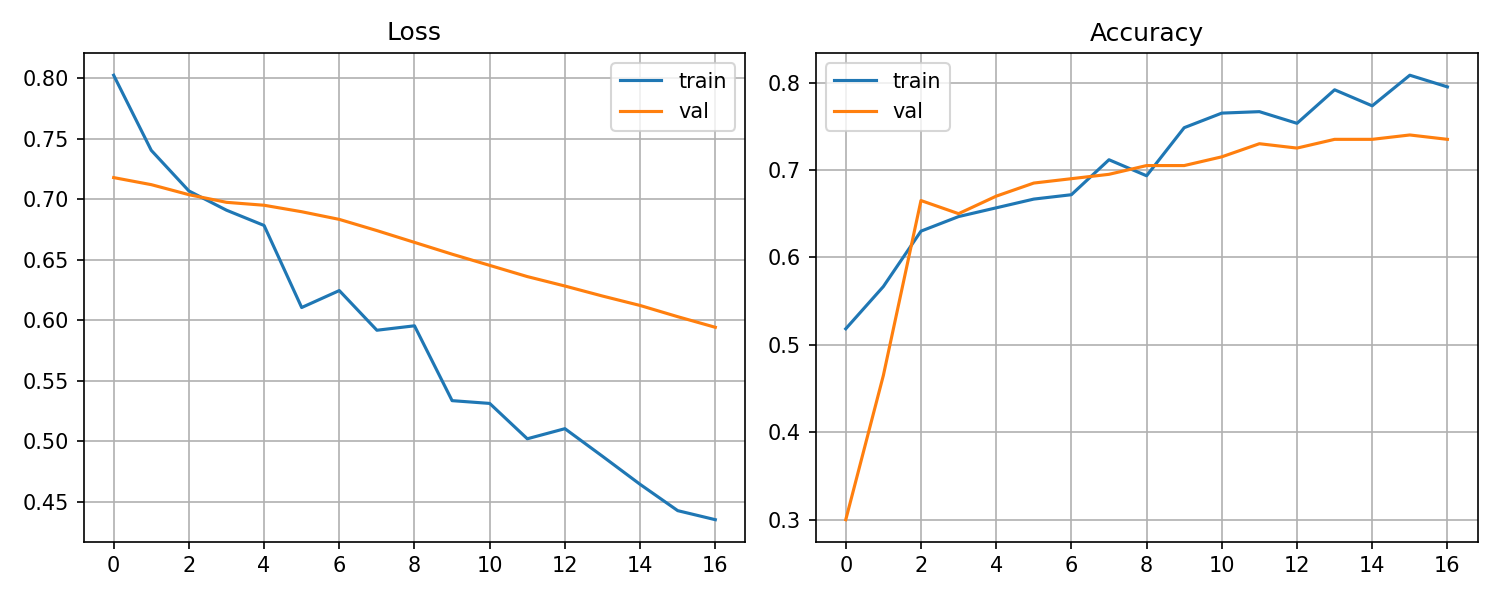

`resnet__lr0.001__bs256__ep20_curves.png`

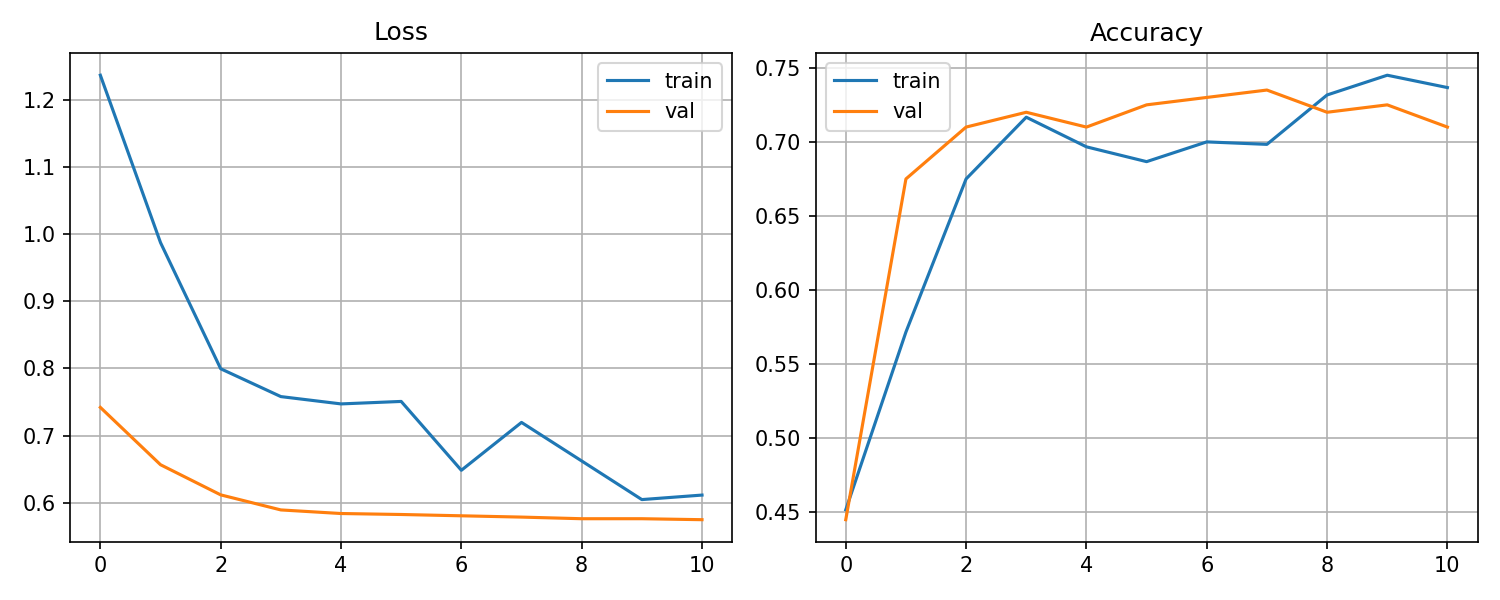

### Curvas ROC

`dnn__lr0.001__bs256__ep20_roc.png`

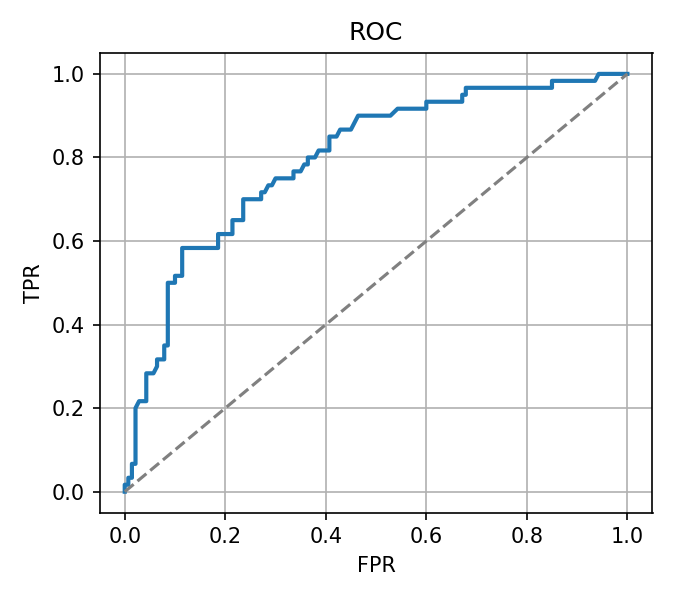

`resnet__lr0.001__bs256__ep20_roc.png`

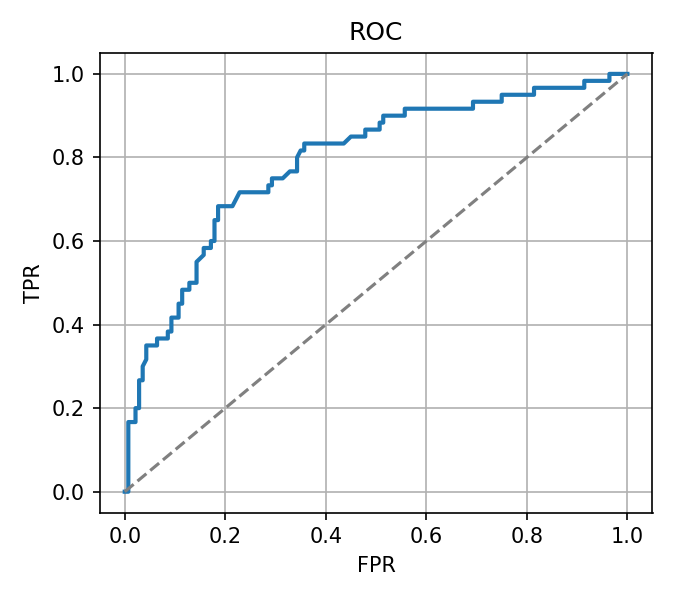

### Matrices de confusión

`dnn__lr0.001__bs256__ep20_cm.png`

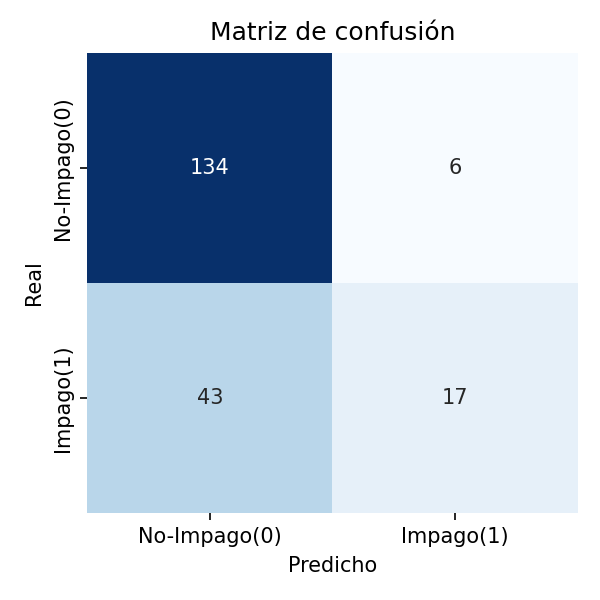

`resnet__lr0.001__bs256__ep20_cm.png`

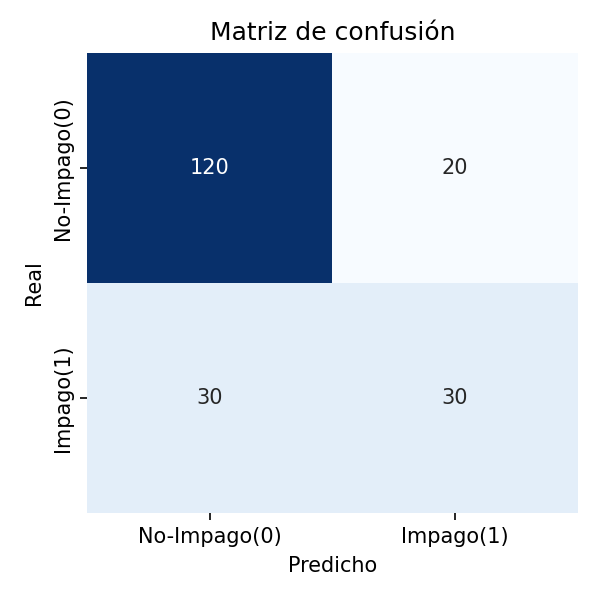

### SHAP Summary

`dnn__lr0.001__bs256__ep20_shap_summary.png`

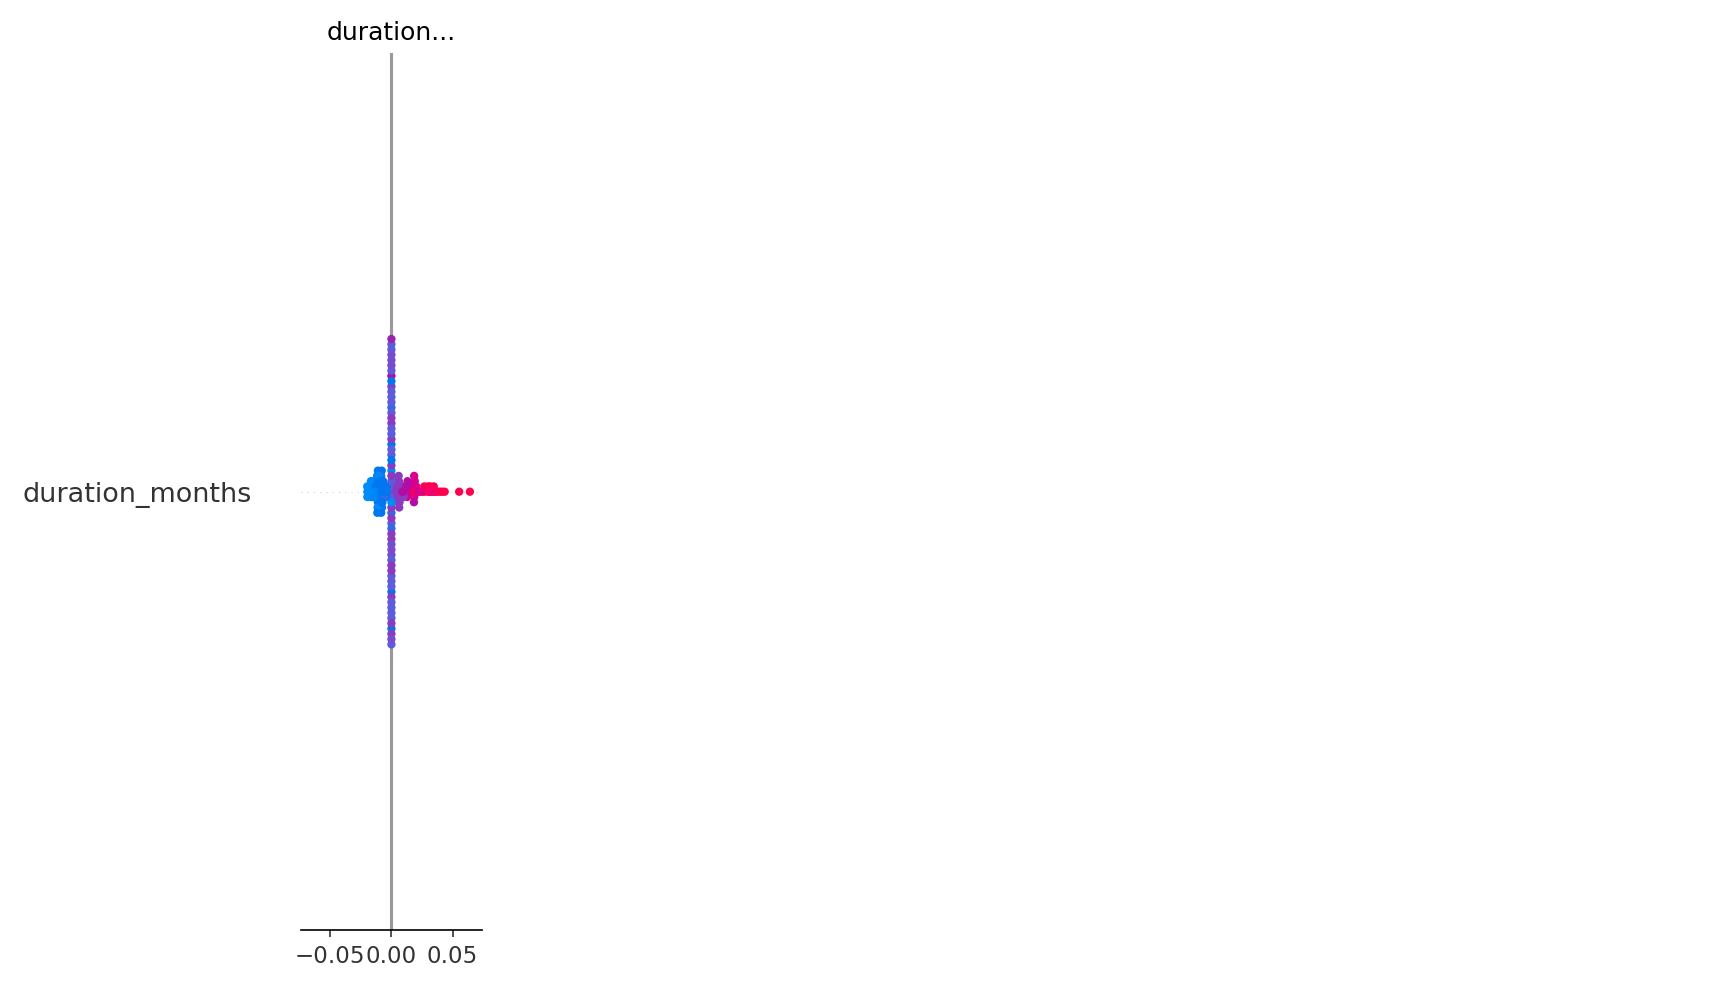

`resnet__lr0.001__bs256__ep20_shap_summary.png`

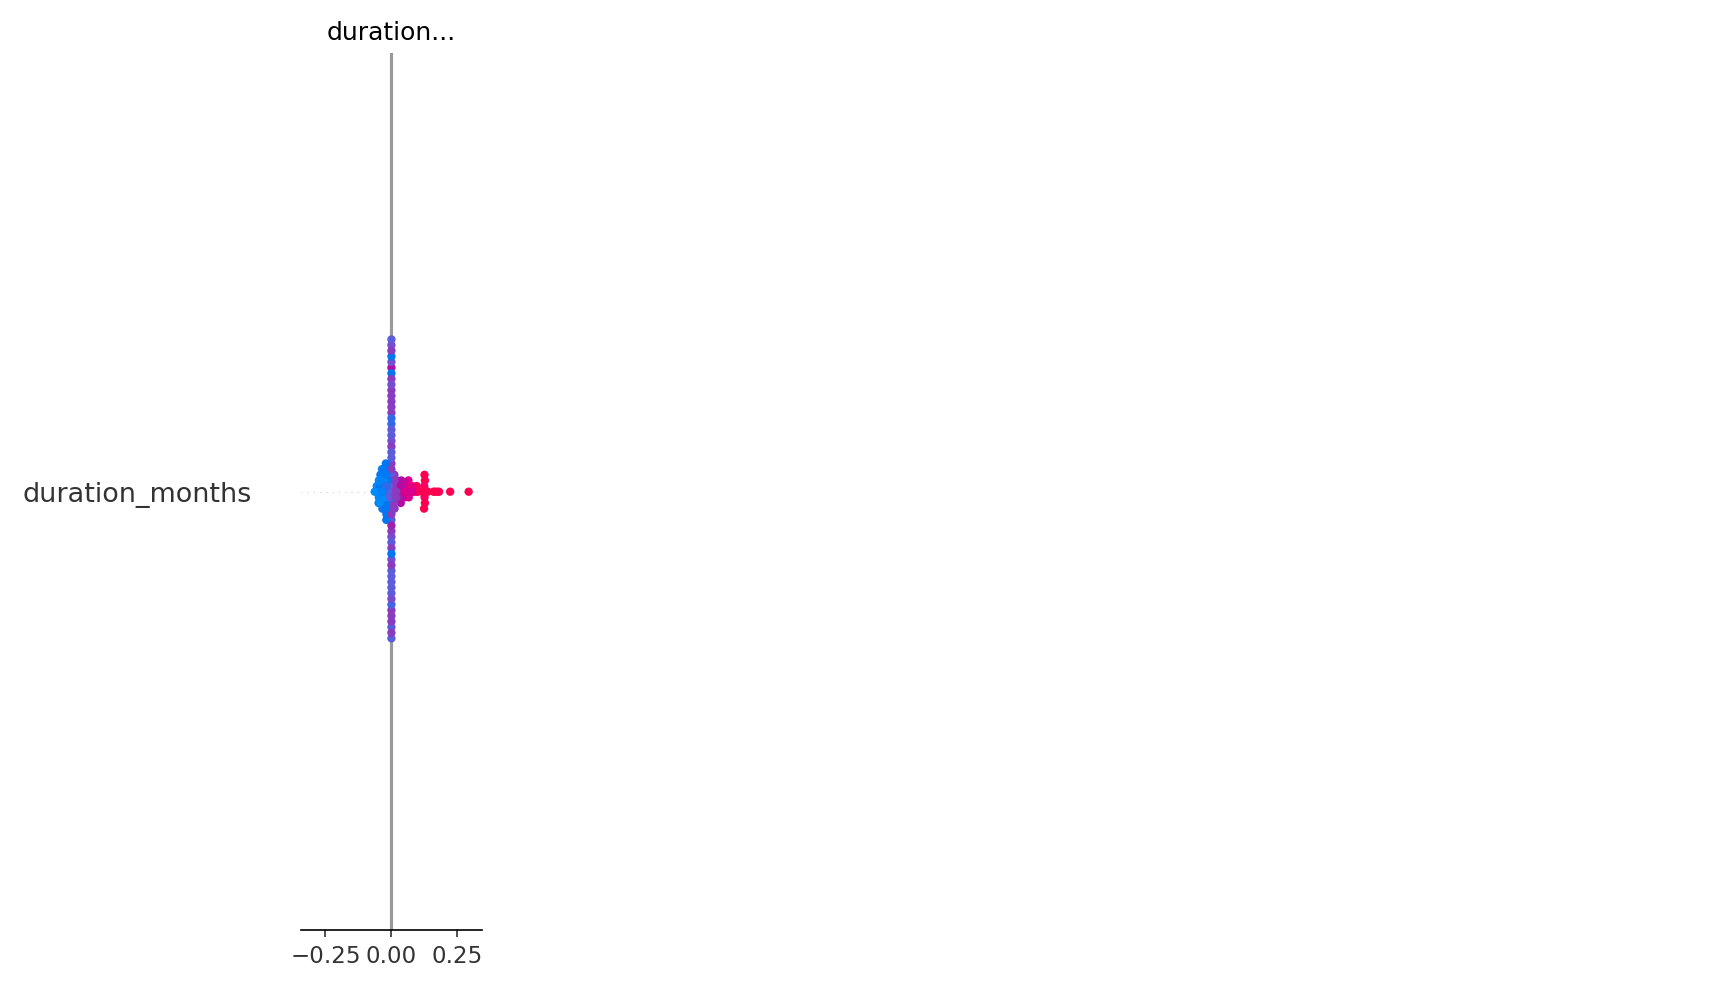


Resumen de ejecuciones:
[
  {
    "run": "dnn__lr0.001__bs256__ep20",
    "roc_auc": 0.7960714285714287,
    "f1": 0.40963855421686746,
    "accuracy": 0.755
  },
  {
    "run": "resnet__lr0.001__bs256__ep20",
    "roc_auc": 0.7914285714285714,
    "f1": 0.5454545454545454,
    "accuracy": 0.75
  }
]


In [4]:
from IPython.display import Image, display, Markdown
import os, json, glob

assert os.path.isdir(OUTDIR), f"No existe {OUTDIR}. ¿Se ejecutó el main?"

def show_group(title, pattern):
    files = sorted(glob.glob(os.path.join(OUTDIR, pattern)))
    display(Markdown(f"### {title}"))
    if not files:
        display(Markdown(f"**No se encontró** `{pattern}`"))
        return
    for f in files:
        display(Markdown(f'`{os.path.basename(f)}`'))
        display(Image(filename=f))

show_group('Curvas de entrenamiento', '*_curves.png')
show_group('Curvas ROC', '*_roc.png')
show_group('Matrices de confusión', '*_cm.png')
show_group('SHAP Summary', '*_shap_summary.png')

summary_path = os.path.join(OUTDIR, 'summary_runs.json')
if os.path.exists(summary_path):
    print('\nResumen de ejecuciones:')
    print(json.dumps(json.load(open(summary_path)), indent=2))

## 💾 Empaquetar resultados (opcional)

In [5]:
import shutil, time
zip_name = f"credit_outputs_local_{int(time.time())}.zip"
shutil.make_archive(zip_name[:-4], 'zip', OUTDIR)
print('ZIP creado:', zip_name)

ZIP creado: credit_outputs_local_1755997457.zip
